# Nota de Estudo — Revisão de Perda de Carga

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 21/08/2025  
> **Primeira publicação:** 26/08/2025   
> **Versão Atual:** v-2025-08-26-a (fase de teste técnico no Colab, teste didático-pedagógico com estudantes e início da revisão final de código/texto)

---

## Objetivo
Revisar, de forma prática e geral, a partir de exemplos, o cálculo e a análise da perda de carga. 

## Estrutura 
- Da 1ª Lei da Termodinâmica à Equação da Perda de Carga
- Cálculo da Perda de Carga
- Especificação do Problema-Exemplo
- Caso A: pressão desconhecida   
- Caso B: vazão desconhecida
- Caso C: diâmetro desconhecido
- Caso D: redução do diâmetro e inclusão de uma nova perda
- Considerações finais

## Observação
Para detalhes específicos, particularmente para os coeficientes de perda de carga de acessórios e rugosidades dos dutos, o estudante deve procurar as referências.

## Referências
- Fox, McDonald, Pritchard & Mitchell. *Introdução à Mecânica dos Fluidos*, 9ª ed., LTC, 2018.
- Moran, Shapiro, Boettner & Bailey. *Princípios de Termodinâmica para Engenharia*, 8ª ed., LTC, 2018.

## Notação

> - $u$: energia interna específica [J/kg]  
> - $h$: entalpia específica [J/kg]  
> - $\rho$: massa específica [kg/m³]   
> - $v$: volume específico  [m³/kg]   
> - $\mu$: viscosidade dinâmica [Pa·s]  
> - $h_L$: perda de carga (energia mecânica específica dissipada) [J/kg]
> - $h_{L,\text{maior}}$: perda de carga maior [J/kg]
> - $h_{L,\text{menor}}$: perda de carga menor [J/kg]
> - $H_L$: altura manométrica [m]   
> - $f$: fator de atrito (adimensional)
> - $K$: coeficiente de perda localizada (adimensional) 
> - $D$: diâmetro [m]
> - $L$: comprimento [m]
> - $L_e$: comprimento equivalente [m]
> - $\epsilon$: rugosidade absoluta [m]
> - $\epsilon/D$: rugosidade relativa (adimensional)  
> - $\alpha$: coeficiente de correção da energia cinética  
> - $\overline V$: velocidade média na seção [m/s]
> - $Q$: vazão [m³/s]

**Observação sobre símbolos e unidades.**  Em Termodinâmica (TD), Transferência de Calor (TC), Mecânica dos Fluidos (MF) e 
Mecânica Geral (MG), é comum o mesmo símbolo representar grandezas diferentes. O caso clássico é **$h$**:
- na TD: entalpia específica $h$ [kJ/kg];  
- na MF (pressão na forma de altura manométrica): altura de perda $H_L$ [m];  
- na MF (energia específica): perda por atrito $h_L$ [m²/s²=J/kg=N·m/kg];  
- na TC: coeficiente convectivo $h_c$ [W/(m²·K)];
- na MG: altura $h$ [m].

Por isso, é bom definir bem o símbolo e a unidade. Quanto às unidades, a diferença entre essas sub-áreas é, 
em geral, de escala (tudo continua no SI):
- em TD predominam múltiplos: kPa, kJ, kW;  
- em MF/TC/MG muitos livros usam as unidades base: Pa, J, W.

Devemos ter cuidado também com os prefixos: $1\ \text{kPa}=10^3\ \text{Pa}$, $1\ \text{kJ}=10^3\ \text{J}$, $1\ \text{kW}=10^3\ \text{W}$. Neste notebook, vamos usar o SI internamente nos cálculos, *i.e.*, m, s, kg, Pa. Mas, nas saídas, podemos imprimir 
em mm, kPa, kJ, kW ou m³/h quando for mais conveniente.


# Da 1ª Lei da Termodinâmica à Equação da Perda de Carga

A 1ª Lei da Termodinâmica aplicada a um volume de controle genérico, é dada por:
   
$$
\frac{dE_{vc}}{dt} = \sum_{\text{ent}} \dot m \left(h + \frac{\overline{V^2}}{2} + gz\right) - \sum_{\text{sai}} \dot m \left(h + \frac{\overline{V^2}}{2} + gz\right) + \sum \dot Q - \sum \dot W_s \tag{1} 
$$

Sabendo que:
$$
h = u + pv    \tag{2} 
$$

$$
v = \frac{1}{\rho} \tag{3}
$$

chegamos à: 

$$
\def\TALL{\sum_{\text{in}} \dot m \left( \frac{p}{\rho} + \frac{\overline{V^2}}{2} + gz\right)}    
\underbrace{\frac{dE_{vc}}{dt} \vphantom{\TALL}}_{\text{variação da energia no V.C.}} 
= \underbrace{ \left( \sum_{\text{ent}} \dot m u - \sum_{\text{sai}} \dot m u \right)}_{\substack{\text{variação da energia interna} \\ \text{entre as entradas e as saídas}}} 
+ \underbrace{ \sum_{\text{ent}} \dot m \left( \frac{p}{\rho} + \frac{\overline{V^2}}{2} + gz\right) 
- \sum_{\text{sai}} \dot m \left( \frac{p}{\rho} + \frac{\overline{V^2}}{2} + gz\right) }_{\substack{\text{variação de energia mecânica} \\ \text{entre as entradas e as saídas}}}
+ \underbrace{ \sum \dot Q - \sum \dot W_s \vphantom{\TALL} }_{\text{calor e trabalho}}  \tag{4}
$$

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-perda-carga-fig-01.png"
       alt="Tubulação genérica"
       width="400" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Tubulação genérica.</figcaption>
</figure>   


                                                           
Agora, se considerarmos o caso particular de uma tubulação (*i.e.*, apenas uma entrada e uma saída), 
em regime permanente ($dE_{vc}/dt=0$), adiabática ($\sum \dot Q = 0$), sem transferência de trabalho ($\sum \dot W_s = 0$), 
e introduzirmos a perda de carga,

$$
h_L =u_{out} - u_{in} \tag{5}
$$

chegamos finalmente à **Equação da Perda de Carga**:
    
$$
\boxed{\left(\frac{p}{\rho} + \alpha \frac{\overline V^2}{2} + gz\right)_1
- \left(\frac{p}{\rho} + \alpha \frac{\overline V^2}{2} + gz\right)_2
= h_L \;\; (\ge 0)}   \tag{6}
$$

Na qual se vê, claramente, que a perda de carga total ($h_L$) representa a transformação de energia mecânica em energia interna devido às irreversibilidades.

### Observação sobre o coeficiente de correção da energia cinética, $\alpha$
    
Se olharmos a Eq. (3) em detalhes, veremos que houve a inclusão do coficiente $\alpha$. Isso foi feito 
para levar em conta o fato que a velocidade média ($\overline V$ é ligada à vazão) ao quadrado é diferente 
da velocidade ao quadrado ($\overline{V^2}$ é relativa à energia cinética) média. A definição de $\alpha$ é:
                                                 
$$
\alpha = \frac{\overline{V^2}}{(\overline V)^2} \tag{7}
$$

e seus valores típicos são:
- Escoamento laminar: $\alpha = 2$  
- Escoamento turbulento: $\alpha = 1$  
- Transição: usar correlações específicas 

# Cálculo da Perda de Carga  

## Perda de carga total

Comumente, dividimos a perda de carga total em dois grandes grupos: 
**perdas maiores** (*i.e.*, trechos retos da tubulação) e **perdas menores** (*e.g.*, válvulas, joelhos, entradas). 
Dividindo cada um desses grupos em subgrupos (*i.e.*, cada um dos trechos retos, cada um dos componentes), podemos escrever a perda de carga total como:
    
$$
h_L = \sum h_{L,\text{maior}} + \sum h_{L,\text{menor}}   \tag{8}
$$

### Perdas maiores

Nos trechos retos, as perdas de carga maiores são calculadas por

$$
h_{L,\text{maior}} = f \,\frac{L}{D}\, \frac{\overline V^2}{2}  \tag{9}
$$

O coeficiente de atrito, $f$, é calculado por:

$$
f = \frac{64}{Re} \qquad \text{(escoamento laminar)}  \tag{10}
$$

$$
f = f(Re, \varepsilon/D) \qquad \text{(escoamento turbulento)}  \tag{11}
$$

A forma mais comum de calcular $f$ para escoamento turbulento é usando a equação de **Colebrook** (coeficiente de atrito de Darcy):

$$
\frac{1}{\sqrt{f}} =
-2 \log_{10}\left(\frac{\varepsilon/D}{3.7} + \frac{2.51}{Re\sqrt{f}}\right)  \tag{12}
$$

Notamos que esta é uma equação implícita em $f$, o que significa que não podemos isolar $f$ à esquerda. Ou, pensando do ponto de vista prático, 
temos que determinar $f$ numericamente. Outra forma de se obter o coeficiente de atrito, $f$, é pelo Diagrama de Moody, um método bastante útil 
quando se resolve o problema com cálculos manuais.

### Número de Reynolds

O Número de Reynolds é definido por:
    
$$
Re = \frac{\rho \overline V D}{\mu}  \tag{13}
$$

Para escoamento interno em tubulações, o número de Reynolds caracteriza o tipo de escoamento:

- Escolamento laminar: $Re \lesssim 2300$  
- Escoamento de transição: $2300 < Re < 4000$  
- Escoamento Turbulento: $Re \gtrsim 4000$


## Perdas menores

As perdas menores podem ser calculadas de duas formas diferentes, dependendo da forma com que são apresentadas nos artigos,
manuais e catálogos:
    
- Por coeficiente de perda de carga, $K$:  
  $$
  h_{L,\text{menor}} =  K \,\frac{\overline V^2}{2}   \tag{14}
  $$
- Por comprimento equivalente, $L_e$:  
  $$
  h_{L,\text{menor}} =  f\,\frac{L_e}{D}\,\frac{\overline V^2}{2}    \tag{15}
  $$

Comparando as duas equações acima, percebe-se que há uma relação entre ambas:

  $$
  K = f\,\frac{L_e}{D}    \tag{16}
  $$
                    
O comprimento equivalente significa que determinado acessório, *e.g.*, uma curva, provoca a mesma perda de carga que 
um trecho reto de tubulação com comprimento $L_e$.


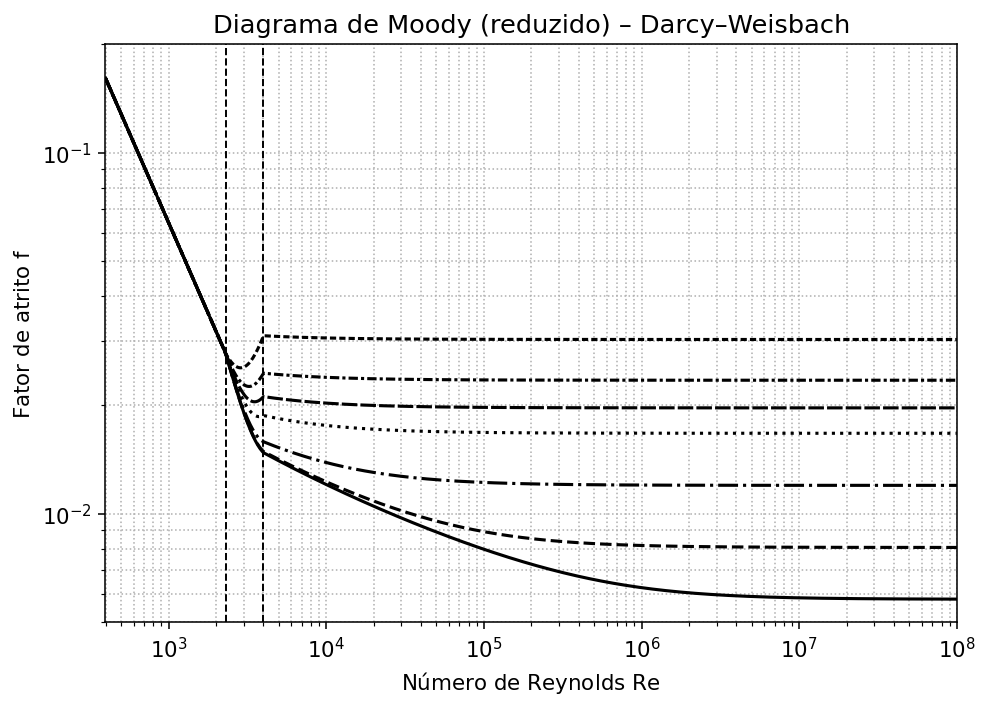

In [1]:
# Diagrama de Moody (reduzido) – linhas em P&B, sem legenda
# ---------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Aparência básica (P&B)
plt.rcParams.update({
    "figure.dpi": 140,
    "font.size": 11,
    "axes.grid": True,
    "grid.linestyle": ":",
    "mathtext.default": "regular",
})

# --- Colebrook-White (turbulento); laminar: f = 64/Re ---
def _colebrook_turbulent(Re, eD):
    """Fator de atrito (Darcy) para regime turbulento (Colebrook-White)."""
    Re = np.asarray(Re, dtype=float)
    eD = np.asarray(eD, dtype=float)
    # chute explícito (Swamee–Jain)
    f0 = 0.25 / (np.log10(eD/3.7 + 5.74/np.power(Re, 0.9)))**2
    x = 1/np.sqrt(f0)           # x = 1/sqrt(f)
    for _ in range(12):         # iteração fixa (converge rápido)
        x = -2*np.log10(eD/3.7 + 2.51/(Re*x))
    return 1/(x**2)

def friction_factor(Re, eD):
    """Fator de atrito Darcy-Weisbach para todo o espectro."""
    Re = np.asarray(Re, dtype=float)
    f = np.empty_like(Re)
    lam = Re < 2300
    tur = Re >= 4000
    trn = (~lam) & (~tur)
    f[lam] = 64.0/Re[lam]
    f[tur] = _colebrook_turbulent(Re[tur], eD if np.isscalar(eD) else eD[tur])
    # transição: mistura linear (apenas para suavizar a visualização)
    if np.any(trn):
        f_l = 64.0/Re[trn]
        f_t = _colebrook_turbulent(Re[trn], eD if np.isscalar(eD) else eD[trn])
        w = (Re[trn] - 2300.0) / (4000.0 - 2300.0)
        f[trn] = (1-w)*f_l + w*f_t
    return f

# Eixos e dados
Re = np.logspace(2.6, 8.0, 700)                   # ~400 a 1e8
eD_list = [1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 2e-3, 5e-3]  # rugosidade relativa
linestyles = ["-", "--", "-.", ":", (0,(5,1)), (0,(3,1,1,1)), (0,(2,1))]

fig, ax = plt.subplots(figsize=(7.2, 5.2))

for ls, eD in zip(linestyles, eD_list):
    f = friction_factor(Re, eD)
    ax.loglog(Re, f, linestyle=ls, color="k", lw=1.6)

# demarcação de transição
ax.axvline(2300, color="k", ls="--", lw=1)
ax.axvline(4000, color="k", ls="--", lw=1)

# rótulos
ax.set_title("Diagrama de Moody (reduzido) – Darcy–Weisbach")
ax.set_xlabel(r"Número de Reynolds $Re$")
ax.set_ylabel(r"Fator de atrito $f$")

# limites e grade
ax.set_xlim(Re.min(), Re.max())
ax.set_ylim(0.005, 0.2)
ax.grid(True, which="both", linestyle=":", linewidth=0.8)

plt.tight_layout()
plt.show()


## Relação entre vazão, velocidade, diâmetro e área

Lembremos da relação entre vazão velocidade, diâmetro e área - pode ser útil nos cálculos:

$$
Q = \frac{\overline V}{A}  \tag{17}
$$

$$
A = \frac{\pi D^2}{4}  \tag{18}
$$

## Perda de carga como altura manométrica
    
É comum definir a perda de carga em termos de altura manométrica:

$$
H_L = \frac{h_L}{g}  \tag{21}
$$

Expressa desse jeito, fica mais fácil comparar o efeito da perda de carga com o elevação do fluido a uma certa altura.

## O caso particular sem variação de energia cinética e potencial

Quando não há variação de energia cinética e potencial, a equaçao da perda de carga (Eq.6) fica mais simples:
    
$$
\Delta p \approx \rho \, h_L  \tag{19}
$$

Por isso é comum as pessoas associarem a perda de carga à queda de pressão, não ao caso mais geral que vimos aqui, 
que é a perda de carga como transformação de energia mecânica em energia interna devido às irreversibilidades.

## O caso geral quando há uma turbina ou bomba na linha

Quando há uma turbina ou uma bomba na linha, o balanço de energia também é modificado pelas suas presenças:

$$
\left(\frac{p}{\rho} + \alpha \frac{\overline V^2}{2} + gz\right)_1
- \left(\frac{p}{\rho} + \alpha \frac{\overline V^2}{2} + gz\right)_2 - \frac{\Delta p_{\text{turb}}}{\rho} + \frac{\Delta p_{\text{bomba}}}{\rho} 
= h_L   \tag{20}
$$

# Problema-Exemplo

O Problema-Exemplo apresentado nesta seção será usado no restante desta nota de estudo, nos Casos A-D, mudando alguns detalhes sucessivamente.

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-perda-carga-fig-02.png"
       alt="Esquema do Problema-Exemplo entre pontos 1 e 2"
       width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Esquema do Problema-Exemplo. No trecho 1-A há uma válvula gaveta, A-B é um trecho reto, B-C um joelho, e C-2 um novo trecho reto.</figcaption>
</figure>


A Fig.2 mostra o exemplo de uma tubulação com dois trechos retos, uma válvula gaveta e um joelho em 90 graus. Vamos usar os seguintes dados:

> - Fluido: água a $20^\circ\text{C}$ $\quad$ → $\rho = 998\ \text{kg/m}^3$, $\mu = 1{,}002\times10^{-3}\ \text{Pa·s}$  
> - Tubulação: rugosidade absoluta (aço comercial) $\epsilon = 4{,}5\times10^{-5}\ \text{m}$  
> - Trechos retos: $A\!\to\!B:\ L_{AB} = 40\ \text{m}$; $\quad$ $C\!\to\!2:\ L_{C2}=8\ \text{m}$ (trecho vertical, logo $\Delta z = +8\ \text{m}$)  


Ohando nas referências, encontramos os seguintes dados para as perdas menores:

>   - Válvula gaveta (entre $1$ e $A$): método do comprimento equivalente com $(L_e/D)_{\text{gaveta}} = 8$  (aberta)  
>   - Joelho $90^\circ$ (entre $B$ e $C$): método do comprimento equivalente com $(L_e/D)_{\text{joelho}} = 60$

Para este problema-exemplo, em que não há variação de energia cinética entre a entrada e a saída, e considerando duas perdas maiores 
e duas menores, a Equação de Perda de Carga (Eq.6) é:
$$
\frac{ (p_1 - p_2)}{\rho} - g (z_2 - z_1) = f \frac{ \left( L_{AB} + L_{C2} + L_{e,gaveta} + L_{e,joelho} \right) }{D} \frac{\overline V^2}{2} \tag{21}
$$

Em outras palavras, o lado esquerdo da equação diz que, na tubulação, haverá uma transformação de energia de pressão em energia potencial. Já o lado direito (perda de carga), diz que essa transformação, de uma energia mecânica em outra, não será completa.

Nos casos que se seguem, iremos sempre partir da hipótese (mais usual) de que o escoamento é turbulento. Isso significa resolver $f$ por Colebrook e assumir $\alpha=1$ (o que neste estudo não é necessário, pois não há variação de energia cinética). No entanto, após os cálculos, é necessário avaliar se a hipótese de escoamento turbulento estava correta.

# Caso A — cálculo de $\Delta p$, com $D$ e $Q$ conhecidos

**Objetivo.** Determinar $\Delta p$ entre as seções 1–2 de uma linha de mesmo diâmetro, com $D$ e $Q$ conhecidos, incluindo perdas maiores (dois trechos retos) e perdas menores (uma válvula gaveta e um joelho a $90^{\circ}$).

**Dados específicos deste caso:**  
> $D = 0{,}10\ \text{m}$  
> $Q = 80\ \text{m}^3/\text{h}$

**Passos de cálculo:**  
> Cálculo de $Re$ e $V$  
> Cálculo do coeficiente de atrito $f$ pela equação de Colebrook (método das substituições sucessivas)    
> Cálculo das perdas maiores e menores   
> Cálculo do $\Delta p$


In [2]:
# ------------------------------------------------------------
# Caso A — Queda de pressão Δp com D e Q conhecidos
# Método: Colebrook/Darcy (turbulento) e 64/Re (laminar)
# Fórmulas:
#   h_L = f * ( ΣL/D + ΣLe/D ) * V^2/2
#   Δp  = ρ (g Δz + h_L ),    com Δz = L_vertical (positivo para subida)
# ------------------------------------------------------------
from math import log10, sqrt, pi

# ---------------------- Entradas ------------------------------

# Constantes físicas
g   = 9.80665      # m/s^2

# Fluido (água ~20°C)y
rho = 998.0        # kg/m^3
mu  = 1.002e-3     # Pa·s

# Tubo e traçado
D   = 0.100        # m (diâmetro interno)
eps = 4.5e-5       # m (rugosidade absoluta)
L_AB  = 40.0         # m (trecho horizontal)
L_C2  = 8.0          # m (trecho vertical; Δz = +Lv)

# Perdas menores por comprimento equivalente (válvula gaveta aberta + joelho 90°)
L_e_gaveta = 8.0*D    # comprimento equivalente da gaveta
L_e_joelho = 60.0*D   # comprimento equivalente do joelho

# Operação
Q = 80.0/3600.0   # m^3/s (vazão conhecida)

# Parâmetros numéricos
tol   = 1e-12     # tolerância
itmax = 80        # máx. iterações

# ---------------------- A, V e Re -----------------------------
A  = pi * D**2 / 4.0
V  = Q / A
Re = rho * V * D / mu
eps_rel = eps / D

# ------------------ Coeficiente de atrito f -------------------
if Re < 2300.0:   #escoamento laminar
    f = 64.0 / Re
else:  # método das substituições sucessivas (vai atualizando o lado esquerdo e direito sucessivamente)
    f = 1.0 / (-1.8*log10((eps_rel/3.7)**1.11 + 6.9/Re))**2 # chute inicial: Haaland
    for _ in range(itmax):
        f_new = 1.0 / (-2.0*log10(eps_rel/3.7 + 2.51/(Re*sqrt(f))))**2  # Colebrook
        if abs(f_new - f) < tol * max(1.0, f_new):   # testa se encontrou um valor de f que satisfaz Colebrook
            f = float(f_new)   # garante f atualizado antes de sair
            break
        f = f_new

# --------------- Perdas maiores e menores ---------------------
h_L_L_AB = f * (L_AB/D) * V**2 / 2  # perda de carga na tubulação horizontal
h_L_L_C2 = f * (L_C2/D) * V**2 / 2  # perda de carga na tubulação vertical
h_L_L_e_gaveta = f * (L_e_gaveta/D) * V**2 / 2  # perda de carga na válvula gaveta
h_L_L_e_joelho = f * (L_e_joelho/D) * V**2 / 2  # perda de carga no joelho
h_L      = h_L_L_AB + h_L_L_C2 + h_L_L_e_gaveta + h_L_L_e_joelho  # perda de carga total
H_L      = h_L/g  # altura manométrica da perda de carga

# ------------------------- Δp ---------------------------------
dp = rho*(g*L_C2 + h_L)

# ------------------------- Saída -------------------------------
print(f"Caso A | D = {D:.3f} m, Q = {Q*3600:.1f} m³/h, Δz = {L_C2:.1f} m")
print(f"V = {V:.2f} m/s   Re = {Re:.0f}   f = {f:.5f}   eps/D = {eps_rel:.5g}")
print(f"Perda gaveta:   h_L_L_e_gaveta = {h_L_L_e_gaveta:.2f} m²/s²")
print(f"Perda joelho:   h_L_L_e_joelho = {h_L_L_e_joelho:.2f} m²/s²")
print(f"Perda AB:       h_L_L_AB = {h_L_L_AB:.2f} m²/s²")
print(f"Perda C2:       h_L_L_C2 = {h_L_L_C2:.2f} m²/s²")
print(f"Perdas totais:  h_L = {h_L:.1f} m²/s²  |  H_L = {H_L:.4f} m")
print(f"Δp = ρ (g Δz + h_L) = {dp/1e5:.3f} bar  ({dp:.0f} Pa)")

# Percentuais (opcional)
pct = lambda x: 100.0*x/h_L
print(f"Frações: gaveta={pct(h_L_L_e_gaveta):.1f}%, "
      f"joelho={pct(h_L_L_e_joelho):.1f}%, AB={pct(h_L_L_AB):.1f}%, C2={pct(h_L_L_C2):.1f}%")


Caso A | D = 0.100 m, Q = 80.0 m³/h, Δz = 8.0 m
V = 2.83 m/s   Re = 281813   f = 0.01801   eps/D = 0.00045
Perda gaveta:   h_L_L_e_gaveta = 0.58 m²/s²
Perda joelho:   h_L_L_e_joelho = 4.33 m²/s²
Perda AB:       h_L_L_AB = 28.83 m²/s²
Perda C2:       h_L_L_C2 = 5.77 m²/s²
Perdas totais:  h_L = 39.5 m²/s²  |  H_L = 4.0282 m
Δp = ρ (g Δz + h_L) = 1.177 bar  (117720 Pa)
Frações: gaveta=1.5%, joelho=10.9%, AB=73.0%, C2=14.6%


## Discussão do Caso A

**Resultado principal**   
- $V\simeq 2{,}83\ \text{m/s}$, $Re\simeq 2{,}82\times 10^{5}$ (turbulento), $f\simeq 0{,}0180$,     
- $h_L\simeq 39{,}5\ \text{m}^2/\text{s}^2$ $\Rightarrow$ $H_L=h_L/g\simeq 4{,}03\ \text{m}$,     
- $\displaystyle \frac{\Delta p}{\rho g}\simeq 8+4{,}03=12{,}03\ \text{m}$ $\;(\Delta p\approx 1{,}177\ \text{bar})$   
Com $H_L\simeq 4{,}03\ \text{m}$ e $\Delta z=8\ \text{m}$ $\Rightarrow$ atrito ≈ $33{,}5\%$ do total (gravidade ≈ $66{,}5\%$).

**Onde se perde energia mecânica**  
- As parcelas escalam como $h_{L,\bullet}=f\,(L_\bullet/D)\,V^2/2$ (trechos retos) e como $f\,(L_{e\bullet}/D)\,V^2/2$ 
(acessórios por comprimento equivalente).    
- Com $L_{AB}/D=400$, $L_{C2}/D=80$, $L_{\text{e,joelho}}/D=60$, e $L_{\text{e,gaveta}}/D=8$, 
obtém-se **$AB\sim 73\%$**, $C2\sim 15\%$, joelho $\sim 11\%$, gaveta $\sim 1{,}5\%$.     

**Comentários**  
- O termo comum $V^2/2$ revela porque aumentar $Q$ penaliza fortemente o atrito.    
- $V\propto Q/D^2$ e $h_L\propto f\,V^2$ $\Rightarrow$ para $D$ fixo, dobrar $Q$ quase quadruplica $h_L$ (variação de $f$ é lenta).  
- A rugosidade relativa $\varepsilon/D$ é pequena, logo $f$ cai levemente com o aumento de $Re$; o "motor" do atrito aqui é $V^2$ e $L/D$.  
- $V\approx 2{,}8\ \text{m/s}$ é típico/aceitável para água em linhas de processo; acima disso, ruído/erosão começam a ser preocupações.

# Caso B — cálculo de $Q$, com $\Delta p$ e $D$ conhecidos

**Objetivo.** Determinar $Q$ entre as seções 1–2 de uma linha de mesmo diâmetro, com $D$ e $\Delta p$ conhecidos, 
incluindo perdas maiores (dois trechos retos) e perdas menores (uma válvula gaveta e um joelho a $90^{\circ}$).

**Dados específicos deste caso (exemplo):**  
> $D = 0{,}10\ \text{m}$  
> $\Delta p = \Delta p_{\text{caso A}}   \ (\approx 1{,}177\ \text{bar})$

**Passos de cálculo:**  
> Relacionar $\Delta p$ com $Q$ usando a equação $\Delta p(Q)=\rho\,(g\,\Delta z + h_L(Q))$  
> Usar o método da bisseção para determinar o valor de $Q$ que satisfaz a relação acima


In [3]:
# ------------------------------------------------------------
# Caso B — Vazão Q com Δp e D conhecidos (mesma estrutura do Caso A)
# Forma em energia específica:
#   h_L = f * ( ΣL/D + ΣLe/D ) * V^2/2
#   Δp  = ρ ( g Δz + h_L )
# ------------------------------------------------------------
from math import log10, sqrt, pi

# ---------------------- Entradas ------------------------------
g   = 9.80665      # m/s^2
# Fluido (água ~20°C)
rho = 998.0        # kg/m^3
mu  = 1.002e-3     # Pa·s

# Tubo e traçado
D   = 0.100        # m (diâmetro interno)
eps = 4.5e-5       # m (rugosidade absoluta)
L_AB  = 40.0       # m (trecho horizontal)
L_C2  = 8.0        # m (trecho vertical; Δz = +L_C2)

# Perdas menores por comprimento equivalente (válvula gaveta aberta + joelho 90°)
L_e_gaveta = 8.0*D    # comprimento equivalente da gaveta
L_e_joelho = 60.0*D   # comprimento equivalente do joelho

# Operação (alvo de pressão) — do Caso A com Q = 80 m³/h
dp_target_bar = 1.17700            # bar
dp_target     = dp_target_bar*1e5  # Pa

# Parâmetros numéricos
tol   = 1e-12     # tolerância para Colebrook
itmax = 80        # máx. iterações para Colebrook
Qmin = 1e-8 # m^3/s (intervalo inferior da bisseção)
Vmax =  10  # m/s (para calcular o intervalo superior da bisseção) 

# ---------- Relação entre delta_P e Q ---------
def dp_of_Q(Q: float):
    A  = pi * D**2 / 4.0
    V  = Q / A
    Re = rho * V * D / mu
    eps_rel = eps / D
    if Re < 2300.0:
        f = 64.0 / Re
    else:
        f = 1.0 / (-1.8*log10((eps_rel/3.7)**1.11 + 6.9/Re))**2
        for _ in range(itmax):
            f_new = 1.0 / (-2.0*log10(eps_rel/3.7 + 2.51/(Re*sqrt(f))))**2
            if abs(f_new - f) < tol * max(1.0, f_new):
                f = float(f_new)  
                break
            f = f_new
    # perdas (energia específica, m²/s²)
    h_L_L_AB       = f * (L_AB/D)            * V**2 / 2
    h_L_L_C2       = f * (L_C2/D)            * V**2 / 2
    h_L_L_e_gaveta = f * (L_e_gaveta/D)      * V**2 / 2
    h_L_L_e_joelho = f * (L_e_joelho/D)      * V**2 / 2
    h_L = h_L_L_AB + h_L_L_C2 + h_L_L_e_gaveta + h_L_L_e_joelho
    dp  = rho * (g*L_C2 + h_L)
    return dp, V, Re, f, (h_L_L_AB, h_L_L_C2, h_L_L_e_gaveta, h_L_L_e_joelho, h_L)

# ------------------ Resolver Q por bisseção --------------------
Qmax = Vmax*(pi * D**2 / 4.0)
dp_lo, *_ = dp_of_Q(Qmin)
dp_hi, *_ = dp_of_Q(Qmax)

for _ in range(120):
    Qmed = 0.5*(Qmin+Qmax)
    dp_med, *_ = dp_of_Q(Qmed)
    if abs(dp_med - dp_target) < 1e-6 or 0.5*(Qmax - Qmin) < 1e-9:
        Q = Qmed
        break
    if (dp_lo - dp_target) * (dp_med - dp_target) <= 0:
        Qmax = Qmed
        dp_hi = dp_med
    else:
        Qmin = Qmed
        dp_lo = dp_med
        
# ---------------------- Resultados (a partir do Q achado) ---------------
dp, V, Re, f, parts = dp_of_Q(Q)
h_L_L_AB, h_L_L_C2, h_L_L_e_gaveta, h_L_L_e_joelho, h_L = parts
H_L = h_L/g

# ------------------------- Saída -------------------------------
print(f"Caso B | D = {D:.3f} m, Δp = {dp/1e5:.3f} bar  ({dp:.0f} Pa), Δz = {L_C2:.1f} m")
print(f"V = {V:.2f} m/s   Re = {Re:.0f}   f = {f:.5f}   eps/D = {eps_rel:.5g}")
print(f"Perda gaveta:   h_L_L_e_gaveta = {h_L_L_e_gaveta:.2f} m²/s²")
print(f"Perda joelho:   h_L_L_e_joelho = {h_L_L_e_joelho:.2f} m²/s²")
print(f"Perda AB:       h_L_L_AB = {h_L_L_AB:.2f} m²/s²")
print(f"Perda C2:       h_L_L_C2 = {h_L_L_C2:.2f} m²/s²")
print(f"Perdas totais:  h_L = {h_L:.1f} m²/s²  |  H_L = {H_L:.4f} m")
print(f"Q = {Q*3600:.1f} m³/h")

# Percentuais (opcional)
pct = lambda x: 100.0*x/h_L
print(f"Frações: gaveta={pct(h_L_L_e_gaveta):.1f}%, "
      f"joelho={pct(h_L_L_e_joelho):.1f}%, AB={pct(h_L_L_AB):.1f}%, C2={pct(h_L_L_C2):.1f}%")

Caso B | D = 0.100 m, Δp = 1.177 bar  (117700 Pa), Δz = 8.0 m
V = 2.83 m/s   Re = 281736   f = 0.01801   eps/D = 0.00045
Perda gaveta:   h_L_L_e_gaveta = 0.58 m²/s²
Perda joelho:   h_L_L_e_joelho = 4.32 m²/s²
Perda AB:       h_L_L_AB = 28.82 m²/s²
Perda C2:       h_L_L_C2 = 5.76 m²/s²
Perdas totais:  h_L = 39.5 m²/s²  |  H_L = 4.0261 m
Q = 80.0 m³/h
Frações: gaveta=1.5%, joelho=10.9%, AB=73.0%, C2=14.6%


## Discussão do Caso B

**Resultado**  
Como o alvo de pressão e a geometria são os do Caso A, o algoritmo recupera **$Q\approx 80\ \text{m}^3/\text{h}$** (mesmos $V$, $Re$, $f$, $h_L$ dentro do arredondamento). Isso era o esperado.

**Como o código relaciona $\Delta p$ e $Q$**  
- Explicitamos, da Equação da Perda de Carga para o Problema-Exemplo (Eq. 21): $\Delta p(Q)=\rho\,[\,g\,\Delta z+h_L(Q)\,]$.  
- Para cada $Q$: determinamos $V=Q/A$, $Re=\rho V D/\mu$ e $f$ por Colebrook (ou $64/Re$ se laminar) e  
  $h_L(Q)=f\!\left(\sum\dfrac{L}{D}+\sum\dfrac{L_e}{D}\right)\dfrac{V^2}{2}$ (mais os termos por $K$, se houver).  
- A função erro residual $F(Q)=\Delta p(Q)-\Delta p_{\text{alvo}}$ é monotônica crescente (para $D$ fixo), então a bisseção converge.
Em outras palavras, quando o método determina o valor para o qual $F(Q)=0$, significa que $\Delta p(Q)=\Delta p_{\text{alvo}}$.
Isto é, determinamos o valor de $Q$ que satisfaz a Eq. 21.

**Bisseção — como escolher o intervalo e quando parar**
- Extremo à esquerda: usar $Q_{\min}>0$ pequeno (evitar $Q=0$). 
- Extremo à direita:  usar um valor razoável/exagerado máximo para a velocidade (*e.g.*, $V_{\max}=10  \ \text{m/s}$, entao usar $Q_{\max}=V_{\max}*A$    
- Critério de parada: parar quando $|\Delta p(Q)-\Delta p_{\text{alvo}}|<\text{tol}$ ou quando o intervalo ($Q_{\max}-Q_{\min}$) ficar pequeno.

# Caso C — cálculo de $D$, com $\Delta p$ e $Q$ conhecidos

**Objetivo.** Determinar $D$ de uma linha de mesmo diâmetro, com $\Delta p$ e $Q$ conhecidos, incluindo **perdas maiores** (dois trechos retos) e **perdas menores** (uma válvula gaveta e um joelho a $90^{\circ}$).

**Dados específicos deste caso (exemplo):**  
> $Q = 80\ \text{m}^3/\text{h}$  
> $\Delta p = \Delta p_{\text{caso A}} \ (\approx 1{,}177\ \text{bar})$

**Passos de cálculo:**  
> Da Eq. 21, relacionar $\Delta p(D)=\rho\,(g\,\Delta z + h_L(D))$ com $h_L(D)=f\!\left(Re,\ \varepsilon/D\right)\left(\sum\dfrac{L}{D}+\sum \dfrac{L_e}{D}\right)\dfrac{V(D)^2}{2}$  
> Para cada $D$, calcular $A$, $V(D)=Q/A$, $Re=\dfrac{\rho V D}{\mu}$ e então $f$ (turbulento por Colebrook; laminar por $64/Re$)  
> Resolver $\Delta p(D)=\Delta p_{\text{alvo}}$ por bisseção em $D$  
> Com $D$ encontrado, decompor as perdas (retos e acessórios) e conferir $\Delta p$


In [4]:
# ------------------------------------------------------------
# Caso C — Diâmetro D com Δp e Q conhecidos (mesma estrutura dos Casos A/B)
# Forma em energia específica:
#   h_L = f * ( L/D + ΣLe/D ) * V^2/2
#   Δp  = ρ ( g Δz + h_L )
# ------------------------------------------------------------
from math import log10, sqrt, pi

# ---------------------- Entradas ------------------------------
g   = 9.80665      # m/s^2
rho = 998.0        # kg/m^3   (água ~20°C)
mu  = 1.002e-3     # Pa·s
eps = 4.5e-5       # m        (rugosidade absoluta)

# Geometria fixa do traçado
L_AB  = 40.0       # m (trecho horizontal)
L_C2  = 8.0        # m (trecho vertical; Δz = +L_C2)

# Operação — ATUALIZADO para o novo caso (Q = 80 m³/h; Δp do Caso A)
Q = 80.0/3600.0          # m^3/s (vazão conhecida)
dp_target = 1.17700*1e5  # Pa (alvo de pressão do Caso A com Q=80 m³/h)

# Parâmetros numéricos
tol   = 1e-12
itmax = 80
Dmin, Dmax = 0.01, 1.00   # m (intervalo de busca para o diâmetro)

# ---------- Função simples: Δp para um D dado -----------------
def dp_of_D(D):
    A  = pi * D**2 / 4.0
    V  = Q / A
    Re = rho * V * D / mu
    eps_rel = eps / D
    if Re < 2300.0:
        f = 64.0 / Re
    else:
        f = 1.0 / (-1.8*log10((eps_rel/3.7)**1.11 + 6.9/Re))**2  # Haaland (chute)
        for _ in range(itmax):
            f_new = 1.0 / (-2.0*log10(eps_rel/3.7 + 2.51/(Re*sqrt(f))))**2
            if abs(f_new - f) < tol * max(1.0, f_new):
                f = float(f_new)
                break
            f = f_new
    # comprimentos equivalentes (dependem de D): Le = c·D
    L_e_gaveta = 8.0*D
    L_e_joelho = 60.0*D

    # perdas (energia específica, m²/s²)
    h_L_L_AB       = f * (L_AB/D)            * V**2 / 2
    h_L_L_C2       = f * (L_C2/D)            * V**2 / 2
    h_L_L_e_gaveta = f * (L_e_gaveta/D)      * V**2 / 2
    h_L_L_e_joelho = f * (L_e_joelho/D)      * V**2 / 2
    h_L = h_L_L_AB + h_L_L_C2 + h_L_L_e_gaveta + h_L_L_e_joelho
    dp  = rho * (g*L_C2 + h_L)
    return dp, V, Re, f, (h_L_L_AB, h_L_L_C2, h_L_L_e_gaveta, h_L_L_e_joelho, h_L)

# ------------------ Resolver D por bisseção --------------------
dp_lo, *_ = dp_of_D(Dmin)
dp_hi, *_ = dp_of_D(Dmax)

for _ in range(120):
    Dmed = 0.5*(Dmin + Dmax)
    dp_med, *_ = dp_of_D(Dmed)
    if abs(dp_med - dp_target) < 1e-6 or 0.5*(Dmax - Dmin) < 1e-9:
        D = Dmed
        break
    # Δp(D) diminui com D; se Δp(Dmed) > alvo, precisamos de D maior
    if dp_med > dp_target:
        Dmin = Dmed; dp_lo = dp_med
    else:
        Dmax = Dmed; dp_hi = dp_med

# ---------------------- Resultados (com D achado) --------------
dp, V, Re, f, parts = dp_of_D(D)
h_L_L_AB, h_L_L_C2, h_L_L_e_gaveta, h_L_L_e_joelho, h_L = parts
H_L = h_L/g

# ------------------------- Saída -------------------------------
print(f"Caso C | Q = {Q*3600:.1f} m³/h, Δp = {dp/1e5:.3f} bar  ({dp:.0f} Pa), Δz = {L_C2:.1f} m")
print(f"V = {V:.2f} m/s   Re = {Re:.0f}   f = {f:.5f}   eps/D = {eps_rel:.5g}")
print(f"Perda gaveta:   h_L_L_e_gaveta = {h_L_L_e_gaveta:.2f} m²/s²")
print(f"Perda joelho:   h_L_L_e_joelho = {h_L_L_e_joelho:.2f} m²/s²")
print(f"Perda AB:       h_L_L_AB = {h_L_L_AB:.2f} m²/s²")
print(f"Perda C2:       h_L_L_C2 = {h_L_L_C2:.2f} m²/s²")
print(f"Perdas totais:  h_L = {h_L:.1f} m²/s²  |  H_L = {H_L:.4f} m")
print(f"D = {D:.3f} m")

# Percentuais (opcional)
pct = lambda x: 100.0*x/h_L
print(f"Frações: gaveta={pct(h_L_L_e_gaveta):.1f}%, "
      f"joelho={pct(h_L_L_e_joelho):.1f}%, AB={pct(h_L_L_AB):.1f}%, C2={pct(h_L_L_C2):.1f}%")


Caso C | Q = 80.0 m³/h, Δp = 1.177 bar  (117700 Pa), Δz = 8.0 m
V = 2.83 m/s   Re = 281783   f = 0.01801   eps/D = 0.00045
Perda gaveta:   h_L_L_e_gaveta = 0.58 m²/s²
Perda joelho:   h_L_L_e_joelho = 4.32 m²/s²
Perda AB:       h_L_L_AB = 28.82 m²/s²
Perda C2:       h_L_L_C2 = 5.76 m²/s²
Perdas totais:  h_L = 39.5 m²/s²  |  H_L = 4.0261 m
D = 0.100 m
Frações: gaveta=1.5%, joelho=10.9%, AB=73.0%, C2=14.6%


## Discussão do Caso C

**Resultado**  
Como $Q$ e $\Delta p$ vêm do Caso A, o algoritmo recupera **$D\approx 0{,}10\ \text{m}$** 
(afinal, eram os mesmos $V$, $Re$, $f$, $h_L$). Novamente, era o resultado esperado.

**Como o código relaciona $\Delta p$ e $D$**  
- Da equação de perda de carga do Problema-Exemplo: $\Delta p(D)=\rho\,[\,g\,\Delta z+h_L(D)\,]$.  
- Para cada $D$: calcula-se $A=\pi D^2/4$, $V(D)=Q/A$, $Re(D)=\rho V D/\mu$, $f$ por Colebrook (ou $64/Re$ se laminar), e
  $h_L(D)=f(D)\left(\frac{\sum L + \sum L_e}{D}\right)\frac{V(D)^2}{2}$.  
- Define-se o residual $G(D)=\Delta p(D)-\Delta p_{\text{alvo}}$. O método converge quando $G(D)$ tende a 0.

**Bisseção — como escolher o intervalo e quando parar**  
- Extremo à esquerda: usar um $D_{\min}$ pequeno (velocidade alta), o que tende a dar $\Delta p(D_{\min})\gg\Delta p_{\text{alvo}}$.  
- Extremo à direita: usar um $D_{\max}$ grande (velocidade baixa). 
- Critério de parada: aceitar quando $|\Delta p(D)-\Delta p_{\text{alvo}}|<\text{tol}$ (em Pa) ou quando a largura do intervalo ficar pequena.


# Caso D — cálculo de $\Delta p$ com $D$ menor e entrada em borda viva

**Objetivo.** Reavaliar $\Delta p$ mantendo a geometria do Caso A, mas agora com **diâmetro menor** e **uma entrada em borda viva**.

**Dados específicos deste caso:**  
> $D = 0{,}08\ \text{m}$ (antes: $0{,}10\ \text{m}$)  
> $Q = 80\ \text{m}^3/\text{h}$  
> Entrada em **borda viva**: coeficiente de perda $K_{\text{ent}}=0{,}5$

**Passos de cálculo (iguais ao Caso A, com um termo a mais):**  
> Cálculo de $V$ e $Re$  
> Cálculo de $f$ (se turbulento, por Colebrook; se laminar, por $64/Re$)  
> Perdas maiores: $f\,(L/D)\,V^2/2$  
> Perdas menores por $\displaystyle L_e$: $f\,(L_e/D)\,V^2/2$ (gaveta $8D$, joelho $60D$)  
> **Nova perda de entrada:** $K_{\text{ent}}\,V^2/2$  
> $\displaystyle \Delta p=\rho\,(g\,\Delta z + h_L)$


In [5]:
# ------------------------------------------------------------
# Caso D — Δp com D=0.08 m e entrada em corda viva (K=0.5)
# Base: Caso A, adicionando a perda K*V^2/2 na entrada
# ------------------------------------------------------------
from math import log10, sqrt, pi

# ---------------------- Entradas ------------------------------
g   = 9.80665      # m/s^2
rho = 998.0        # kg/m^3
mu  = 1.002e-3     # Pa·s

# Tubo e traçado
D   = 0.080        # m (diâmetro interno)
eps = 4.5e-5       # m (rugosidade absoluta)
L_AB  = 40.0       # m (trecho horizontal)
L_C2  = 8.0        # m (trecho vertical; Δz = +L_C2)

# Perdas menores (equivalente em comprimento)
L_e_gaveta = 8.0*D      # gaveta aberta
L_e_joelho = 60.0*D     # joelho 90°
# Perda de entrada em corda viva (coeficiente K)
K_entrada = 0.5

# Operação
Q = 80.0/3600.0   # m^3/s

# Parâmetros numéricos
tol   = 1e-12
itmax = 80

# ---------------------- A, V e Re -----------------------------
A  = pi * D**2 / 4.0
V  = Q / A
Re = rho * V * D / mu
eps_rel = eps / D

# ------------------ Coeficiente de atrito f -------------------
if Re < 2300.0:
    f = 64.0 / Re
else:
    # chute inicial: Haaland
    f = 1.0 / (-1.8*log10((eps_rel/3.7)**1.11 + 6.9/Re))**2
    for _ in range(itmax):
        f_new = 1.0 / (-2.0*log10(eps_rel/3.7 + 2.51/(Re*sqrt(f))))**2
        if abs(f_new - f) < tol * max(1.0, f_new):
            f = float(f_new)
            break
        f = f_new

# --------------- Perdas (energia específica, m²/s²) ----------
h_L_L_AB        = f * (L_AB/D)        * V**2 / 2
h_L_L_C2        = f * (L_C2/D)        * V**2 / 2
h_L_L_e_gaveta  = f * (L_e_gaveta/D)  * V**2 / 2
h_L_L_e_joelho  = f * (L_e_joelho/D)  * V**2 / 2
h_L_K_entrada   = K_entrada           * V**2 / 2   # K direto (não multiplica f)

h_L = h_L_L_AB + h_L_L_C2 + h_L_L_e_gaveta + h_L_L_e_joelho + h_L_K_entrada
H_L = h_L/g

# ------------------------- Δp ---------------------------------
dp = rho*(g*L_C2 + h_L)

# ------------------------- Saída -------------------------------
print(f"Caso D | D = {D:.3f} m, Q = {Q*3600:.1f} m³/h, Δz = {L_C2:.1f} m")
print(f"V = {V:.2f} m/s   Re = {Re:.0f}   f = {f:.5f}   eps/D = {eps_rel:.5g}")
print(f"Perda entrada (K=0.5): h_L_K_entrada = {h_L_K_entrada:.2f} m²/s²")
print(f"Perda gaveta:   h_L_L_e_gaveta = {h_L_L_e_gaveta:.2f} m²/s²")
print(f"Perda joelho:   h_L_L_e_joelho = {h_L_L_e_joelho:.2f} m²/s²")
print(f"Perda AB:       h_L_L_AB = {h_L_L_AB:.2f} m²/s²")
print(f"Perda C2:       h_L_L_C2 = {h_L_L_C2:.2f} m²/s²")
print(f"Perdas totais:  h_L = {h_L:.1f} m²/s²  |  H_L = {H_L:.4f} m")
print(f"Δp = ρ (g Δz + h_L) = {dp/1e5:.3f} bar  ({dp:.0f} Pa)")

# Percentuais (opcional)
pct = lambda x: 100.0*x/h_L
print(f"Frações: entrada={pct(h_L_K_entrada):.2f}%, gaveta={pct(h_L_L_e_gaveta):.2f}%, "
      f"joelho={pct(h_L_L_e_joelho):.2f}%, AB={pct(h_L_L_AB):.2f}%, C2={pct(h_L_L_C2):.2f}%")


Caso D | D = 0.080 m, Q = 80.0 m³/h, Δz = 8.0 m
V = 4.42 m/s   Re = 352266   f = 0.01837   eps/D = 0.0005625
Perda entrada (K=0.5): h_L_K_entrada = 4.89 m²/s²
Perda gaveta:   h_L_L_e_gaveta = 1.44 m²/s²
Perda joelho:   h_L_L_e_joelho = 10.77 m²/s²
Perda AB:       h_L_L_AB = 89.76 m²/s²
Perda C2:       h_L_L_C2 = 17.95 m²/s²
Perdas totais:  h_L = 124.8 m²/s²  |  H_L = 12.7264 m
Δp = ρ (g Δz + h_L) = 2.029 bar  (202850 Pa)
Frações: entrada=3.92%, gaveta=1.15%, joelho=8.63%, AB=71.92%, C2=14.38%


## Discussão do Caso D

Nesta seção, vamos comparar os resultados do caso D com o caso A. Espera-se que o estudante já esteja familiarizado com os nomes das variáveis, 
estágio no qual as expressões matemáticas sucintas passam a falar muito mais do que parágrafos de texto.

**Dados-base** (mesma geometria $L_{AB}=40\,\text{m}$, $L_{C2}=8\,\text{m}$, água 20°C):  
- Caso A: $D_A=0{,}10\,\text{m}$, $Q=80\,\text{m}^3/\text{h}$ (sem entrada);  
  $V_A=2{,}83\,\text{m/s}$, $Re_A=2{,}82\times 10^5$, $f_A=0{,}01801$,  
  $h_{L,A}=39{,}50\,\text{m}^2/\text{s}^2$, $\Delta p_A=1{,}177\,\text{bar}$.  
- Caso D: $D_D=0{,}08\,\text{m}$, $Q=80\,\text{m}^3/\text{h}$, entrada $K=0{,}5$;  
  $V_D=4{,}42\,\text{m/s}$, $Re_D=3{,}52\times 10^5$, $f_D=0{,}01837$,  
  $h_{L,D}=124{,}80\,\text{m}^2/\text{s}^2$, $\Delta p_D=2{,}029\,\text{bar}$.

###  Razões A → D (redução de diâmetro)
- Área: $A_D/A_A=(0{,}08/0{,}10)^2=0{,}64$.  
- Velocidade: $V_D/V_A=(D_A/D_D)^2=1{,}5625$.  
- Reynolds: $Re_D/Re_A=(V_D/V_A)(D_D/D_A)\approx 1{,}25$.  
- Rugosidade relativa: $(\varepsilon/D)_D/(\varepsilon/D)_A=D_A/D_D=1{,}25$.  
- Trechos retos: $\big(\sum L/D\big)_D/\big(\sum L/D\big)_A=D_A/D_D=1{,}25$.  
- Acessórios por $L_e=kD$: $\sum L_e/D=\sum k=68$ (invariável).

**Consequência:** $V^2$ cresce $\approx 2{,}44$ vezes; $\sum L/D$ dos trechos retos cresce $1{,}25$; $f$ aumenta levemente ($\approx 2\%$).

### Perdas e pressão (com e sem a entrada $K$)
- Só efeito de $D$ (sem entrada, $K=0$):  
  $h_{L,D}^{(K=0)}=119{,}92\,\text{m}^2/\text{s}^2 \;\Rightarrow\; h_{L,D}^{(K=0)}/h_{L,A}=119{,}92/39{,}50\approx 3{,}04$.
- Com a entrada $K=0{,}5$ (Caso D completo):  
  $h_{L,D}/h_{L,A}=124{,}80/39{,}50\approx 3{,}16$ (aumento de $\approx 216\%$ em $h_L$).  
  Pressão: $1{,}177\to 2{,}029\,\text{bar}$ (aumento de $\approx 72{,}4\%$).
- Apenas a entrada no Caso D:  
  $h_{L,\text{ent}}=K\,V_D^2/2=4{,}89\,\text{m}^2/\text{s}^2$.  
  Fração: $h_{L,\text{ent}}/h_{L,D}\approx 3{,}92\%$.  
  Incremento relativo em $h_L$ (ligar $K$):  
  $\big(h_{L,D}-h_{L,D}^{(K=0)}\big)/h_{L,D}^{(K=0)}=(124{,}80-119{,}92)/119{,}92\approx 4{,}07\%$.

**Resumo:** reduzir $D$ para $0{,}08\,\text{m}$ praticamente **triplica** as perdas por atrito; a entrada em borda viva adiciona mais **$\sim 4\%$** em $h_L$ dentro do Caso D.


# Considerações Finais

Acabamos de revisar e exercitar o essencial: a conexão entre geometria, regime e perdas na equação de energia. Em termos práticos (para o problema-exemplo que estudamos, sem variação de energia cinética),
$\Delta p = \rho\,(g\,\Delta z + h_L)$, com $h_L$ construído a partir de $f$, de $\sum L/D$ e $\sum L_e/D$.

Em relação à sensibilidade, como $V=4Q/(\pi D^2)$, então $h_L \sim f\left(\sum L/D+\sum L_e/D\right)\,Q^2/D^4$. Em outras palavras, a perda de carga escala com $f^1$, com $L^1$, com $V^2$, com $Q^2$ e com $D^{-5}$.

Atenção, nestes nossos exemplos não havia variação de energia cinética. Quando houver, é preciso adaptar a modelagem, o código e a análise usando a Eq.6 (caso geral).

# Estudos propostos

### (A) Novos casos — modificando este mesmo notebook
1. **Vazão alta:** $D=0{,}10\ \mathrm{m}$, $Q=100\ \mathrm{m^3/h}$, mesma geometria. Calcule $\Delta p$, $H_L$, partição de perdas.
2. **Diâmetro reduzido:** $D=0{,}08\ \mathrm{m}$, $Q=60\ \mathrm{m^3/h}$; adicionar mais 2 joelhos ($+120D$). Calcule $\Delta p$.
3. **Entrada em borda viva:** $D=0{,}10\ \mathrm{m}$, $Q=80\ \mathrm{m^3/h}$, $K_{\text{ent}}=0{,}5$. Compare com o caso sem entrada.
4. **Rugosidade e temperatura:** Refaça o Caso A para aço novo ($\varepsilon=1{,}5\times10^{-5}\ \mathrm{m}$) e para água a $50^\circ\mathrm{C}$ (nova $\mu$). Compare $f$, $h_L$, $\Delta p$.
5. **Rampa descendente:** $D=0{,}10\ \mathrm{m}$, $Q=80\ \mathrm{m^3/h}$, $\Delta z=-5\ \mathrm{m}$. Calcule $\Delta p$ (verifique se o atrito supera a gravidade).
6. **Quase laminar:** $D=0{,}02\ \mathrm{m}$, $Q=0{,}3\ \mathrm{m^3/h}$ (água $20^\circ\mathrm{C}$). Verifique $Re<2300$ e use $f=64/Re$. Calcule $\Delta p$.

### (B) Novos notebooks completos — estudos mais amplos
1. **Curva do sistema $H_{\text{sist}}(Q)$:** varra $Q$ e plote $H_{\text{sist}}=\Delta z+H_L(Q)$; encontre a interseção com uma curva de bomba fornecida ($H_{\text{bomba}}(Q)$) — em notebook separado.
2. **Diâmetro econômico (CAPEX×OPEX):** para $Q$ fixo e horizonte anual, estime energia $\propto \Delta p\,Q$ vs. custo do tubo (função de $D$). Encontre $D$ ótimo.
3. **Traçado alternativo:** compare (i) $L_{AB}=40\ \mathrm{m}$ com 1 joelho; (ii) $L_{AB}=32\ \mathrm{m}$ com 4 joelhos. Mesmos $D$ e $Q$. Discuta trade-offs.
4. **Linhas em paralelo:** dois ramais com $D_1\neq D_2$ e comprimentos distintos. Para $\Delta p$ comum, calcule o $Q$ de cada ramal e o $Q$ total.
5. **Rugosidade e temperatura (ampliado):** faça um “mapa” $f(Re,\varepsilon/D)$ variando $\mu(T)$ e $\varepsilon$; aplique ao Caso A.
6. **Variação de diâmetro entre as seções:** refaça com $D_1\neq D_2$ (1→2). Inclua no balanço o termo cinético $\alpha_2\frac{V_2^2}{2}-\alpha_1\frac{V_1^2}{2}$; para cada seção, calcule $Re$ e adote $\alpha$ coerente (laminar $\alpha\!\approx\!2$, turbulento $\alpha\!\approx\!1$). Considere ainda $K_c, K_e$ se houver contração/expansão. Avalie impacto em $h_L$, $\Delta p$ e na partição de perdas.
